我们应当牢记，看上去无聊的响应曲线：

<img src="img/PID_varyingP.jpg">

实际上对应着这样物理系统:

<img src="img/car.gif">

来源: https://www.cnblogs.com/qsyll0916/p/8580211.html

很多控制问题有这么一个结构，我们有一个参考信号，我们想让被控对象返回的反馈信号接近那个参考信号，从某个稳态向另一个稳态移动，
经历一个相对和快速的过程。换而言之我们想让反馈信号与参考信号之差，误差信号之绝对值最小化，所谓的控制器就是接受误差信号，然后怎么操作一番
（这个操作不止决定于当前的误差情况，也决定于之前的误差。毕竟传递函数本身是对整个信号返回另一个信号）传给被控过程。平凡的控制方法就是保持
误差信号不变，也可以看成比例为1的比例控制器。虽然被控物理系统也经常被看作和PID控制器一样的可以被某种传递函数描述，但显然我们并不能修改
系统本身，只能去辨识它或者直接修改传给它的信号通过调整PID参数达到想要的效果。

离散化，无论是对输入信号还是传递函数，实际上有好几种方式。常见的如直接z变换（由s域到t域，离散采样，再到z域），这是所谓保持单位脉冲法，
但matlab等默认的离散法是加了保持器的保持阶跃输入法。还有好计算但性质不那么好的两种差分法等，当然它们在$T$取的足够小时都能十分逼近原
函数，这就是为什么我们一般直接忘记我们的离散信号来源的模拟系统而直接当作真正的输入就是数字的。

三个MatLab中有的差分方法：

$$
\begin{align*}
z &= e^{sT} \approx 1 + sT \quad \text{(Forward difference)} \\
z &= e^{sT} \approx \frac{1}{1-sT} \quad \text{(Backward difference)} \\
z &= e^{sT} \approx \frac{1+sT/2}{1-sT/2} \quad \text{(Tustin's approximation)}
\end{align*}
$$

In [8]:
import control as cnt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
sysc = cnt.tf([1],[1,1,0])

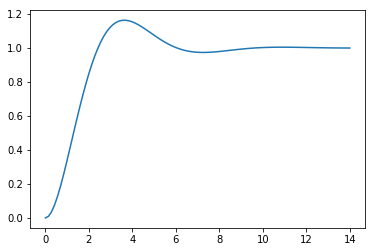

In [11]:
plt.plot(*cnt.step_response(cnt.feedback(sysc)))

In [18]:
sysd = cnt.feedback(cnt.c2d(sysc, 1.0))

In [20]:
t, y = cnt.step_response(sysd)

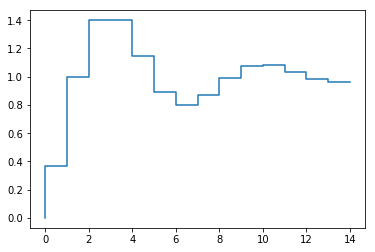

In [23]:
plt.step(t,y[0])

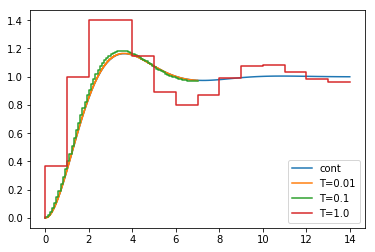

In [43]:
t, Y = cnt.step_response(cnt.feedback(sysc))
plt.plot(t,Y,label='cont')

for T in [0.01,0.1,1.0]:
    t,Y = cnt.step_response(cnt.feedback(cnt.c2d(sysc,T)))
    plt.step(np.linspace(t[0],t[-1],Y.shape[1]),Y[0],label='T={}'.format(T))
plt.legend()
plt.show()


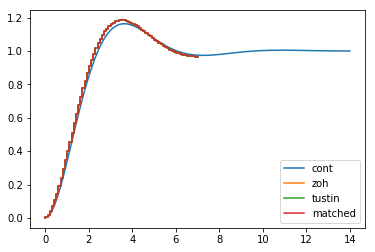

In [49]:
t, Y = cnt.step_response(cnt.feedback(sysc))
plt.plot(t,Y,label='cont')

T = 0.1
for method in ['zoh','tustin','matched']:
    t,Y = cnt.step_response(cnt.feedback(cnt.c2d(sysc,T)))
    plt.step(np.linspace(t[0],t[-1],Y.shape[1]),Y[0],label=method)
plt.legend()
plt.show()


看得出结果十分相似。